In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [ ]:

import pandas as pd

# Load hour.csv and day.csv
hour_df = pd.read_csv('hour.csv')
day_df = pd.read_csv('day.csv')

# Display the first few rows to confirm
print(hour_df.head())
print(day_df.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

In [ ]:
# Check the data type of 'dteday' column
print(hour_df['dteday'].dtype)
print(day_df['dteday'].dtype)

object
object


In [ ]:
# Convert 'dteday' to datetime format
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], errors='coerce')
day_df['dteday'] = pd.to_datetime(day_df['dteday'], errors='coerce')

# Check again if the conversion was successful
print(hour_df['dteday'].dtype)
print(day_df['dteday'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
# Check for missing or invalid dates after conversion
print(hour_df['dteday'].isnull().sum())
print(day_df['dteday'].isnull().sum())

# Option 1: Drop rows with invalid dates (if any)
hour_df.dropna(subset=['dteday'], inplace=True)
day_df.dropna(subset=['dteday'], inplace=True)

# Option 2: Handle them in other ways (e.g., fill with a default value)

0
0


In [ ]:
# Extract year, month, and day from 'dteday'
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['day'] = hour_df['dteday'].dt.day

day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day

In [ ]:
# Drop 'dteday' column if it's not needed for modeling
hour_df.drop(columns=['dteday'], inplace=True)
day_df.drop(columns=['dteday'], inplace=True)

In [ ]:
# Check for missing values
print(hour_df.isnull().sum())
print(day_df.isnull().sum())


instant       0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
month         0
day           0
dtype: int64
instant       0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
month         0
day           0
dtype: int64


In [ ]:
import numpy as np

# Convert hour to cyclical features in 'hour_df'
hour_df['hour_sin'] = np.sin(2 * np.pi * hour_df['hr'] / 24)
hour_df['hour_cos'] = np.cos(2 * np.pi * hour_df['hr'] / 24)

# Similarly, transform month and weekday (optional, for 'day_df')
day_df['month_sin'] = np.sin(2 * np.pi * day_df['mnth'] / 12)
day_df['month_cos'] = np.cos(2 * np.pi * day_df['mnth'] / 12)
day_df['weekday_sin'] = np.sin(2 * np.pi * day_df['weekday'] / 7)
day_df['weekday_cos'] = np.cos(2 * np.pi * day_df['weekday'] / 7)

In [ ]:
scaler = StandardScaler()
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
hour_df[numerical_features] = scaler.fit_transform(hour_df[numerical_features])
day_df[numerical_features] = scaler.fit_transform(day_df[numerical_features])

In [ ]:
day_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,casual,registered,cnt,year,month,day,month_sin,month_cos,weekday_sin,weekday_cos
0,1,1,0,1,0,6,0,2,-0.826662,-0.679946,...,331,654,985,2011,1,1,0.5,0.866025,-0.781831,0.623490
1,2,1,0,1,0,0,0,2,-0.721095,-0.740652,...,131,670,801,2011,1,2,0.5,0.866025,0.000000,1.000000
2,3,1,0,1,0,1,1,1,-1.634657,-1.749767,...,120,1229,1349,2011,1,3,0.5,0.866025,0.781831,0.623490
3,4,1,0,1,0,2,1,1,-1.614780,-1.610270,...,108,1454,1562,2011,1,4,0.5,0.866025,0.974928,-0.222521
4,5,1,0,1,0,3,1,1,-1.467414,-1.504971,...,82,1518,1600,2011,1,5,0.5,0.866025,0.433884,-0.900969


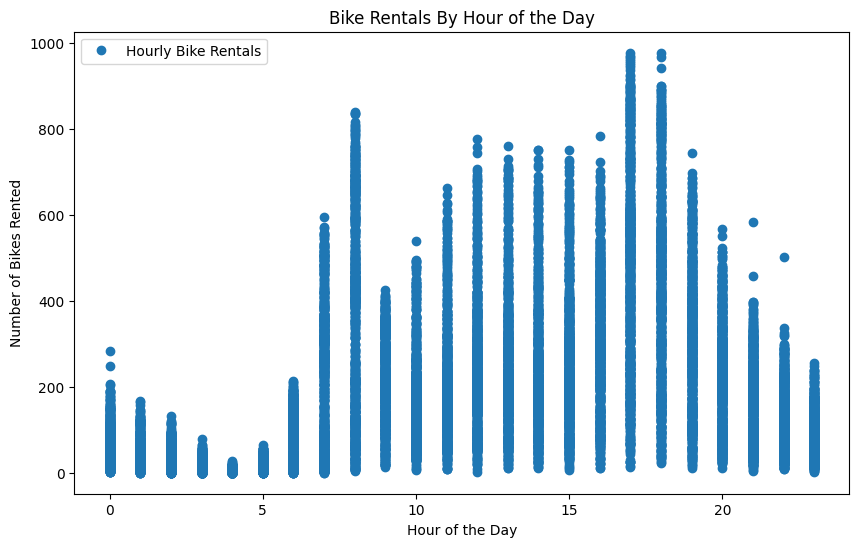

In [ ]:
import matplotlib.pyplot as plt


# Hourly rentals trend for a few days (for readability, limit to a few days)
plt.figure(figsize=(10, 6))
plt.plot(hour_df['hr'], hour_df['cnt'], 'o', label='Hourly Bike Rentals')
plt.title('Bike Rentals By Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bikes Rented')
plt.legend()
plt.show()

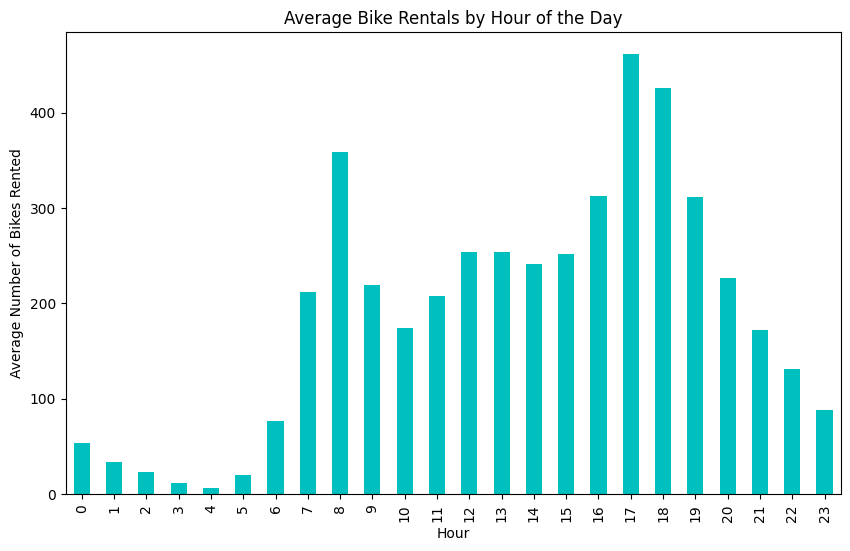

In [ ]:
plt.figure(figsize=(10, 6))
hour_avg = hour_df.groupby('hr')['cnt'].mean()
hour_avg.plot(kind='bar', color='c')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Number of Bikes Rented')
plt.show()

<Figure size 1000x600 with 0 Axes>

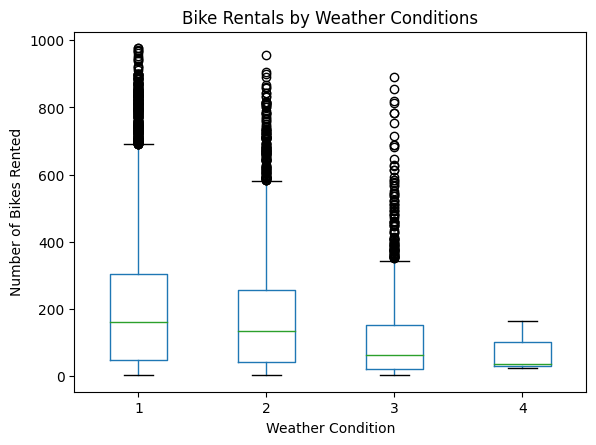

In [ ]:
plt.figure(figsize=(10, 6))
hour_df.boxplot(column='cnt', by='weathersit', grid=False)
plt.title('Bike Rentals by Weather Conditions')
plt.suptitle('')  # Remove the automatic title
plt.xlabel('Weather Condition')
plt.ylabel('Number of Bikes Rented')
plt.show()

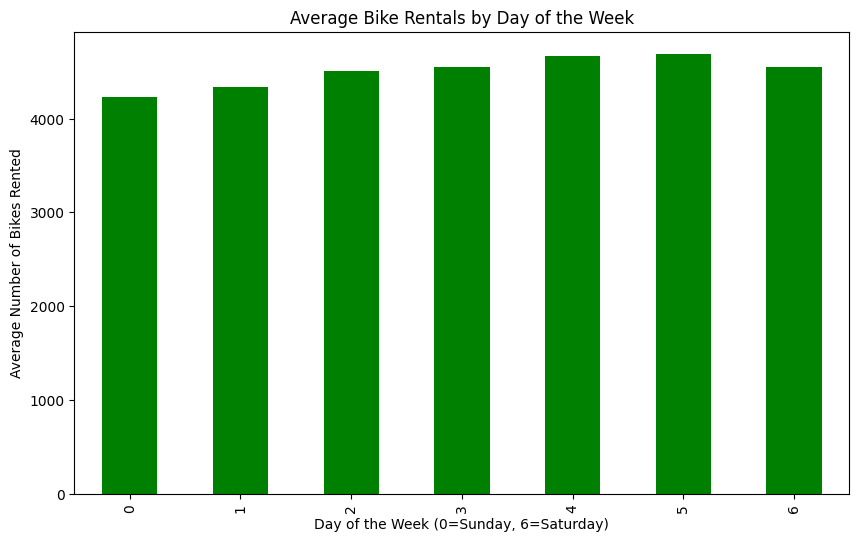

In [ ]:
plt.figure(figsize=(10, 6))
day_avg = day_df.groupby('weekday')['cnt'].mean()
day_avg.plot(kind='bar', color='g')
plt.title('Average Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week (0=Sunday, 6=Saturday)')
plt.ylabel('Average Number of Bikes Rented')
plt.show()

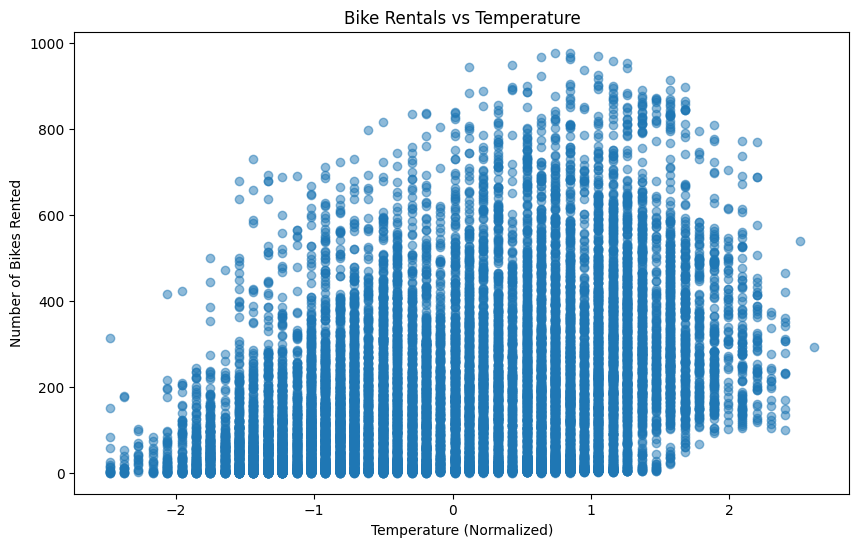

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['temp'], hour_df['cnt'], alpha=0.5)
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Number of Bikes Rented')
plt.show()

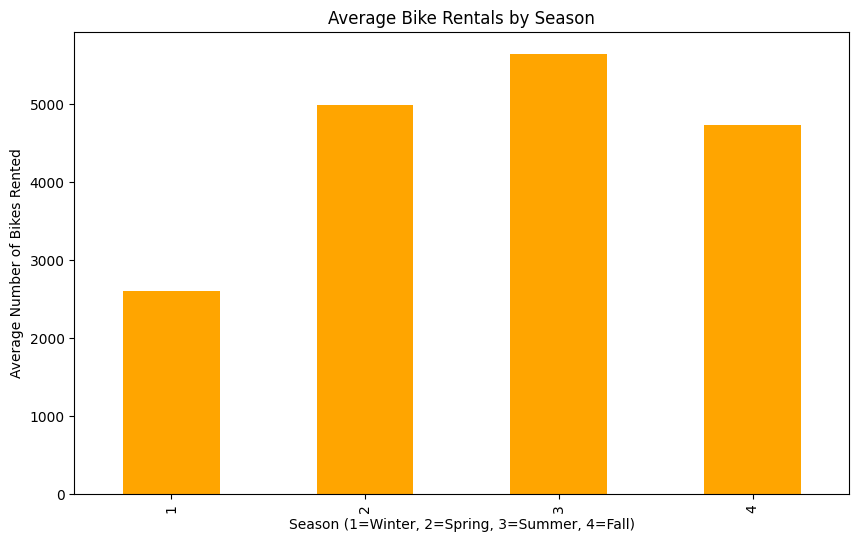

In [ ]:
plt.figure(figsize=(10, 6))
season_avg = day_df.groupby('season')['cnt'].mean()
season_avg.plot(kind='bar', color='orange')
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season (1=Winter, 2=Spring, 3=Summer, 4=Fall)')
plt.ylabel('Average Number of Bikes Rented')
plt.show()

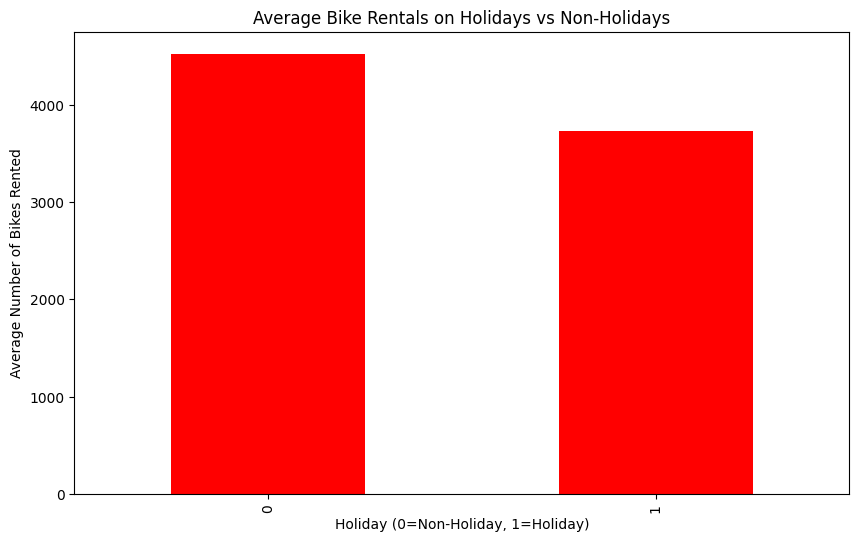

In [ ]:
plt.figure(figsize=(10, 6))
holiday_avg = day_df.groupby('holiday')['cnt'].mean()
holiday_avg.plot(kind='bar', color='red')
plt.title('Average Bike Rentals on Holidays vs Non-Holidays')
plt.xlabel('Holiday (0=Non-Holiday, 1=Holiday)')
plt.ylabel('Average Number of Bikes Rented')
plt.show()

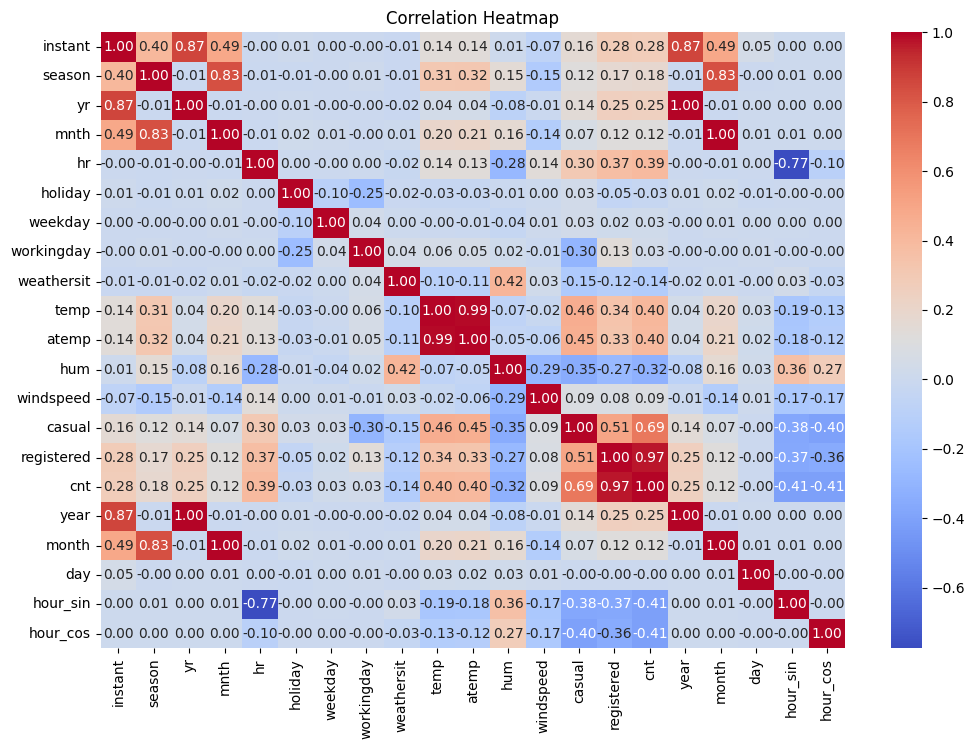

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
year          0.250495
season        0.178056
mnth          0.120638
month         0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
day          -0.004312
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
hour_cos     -0.408447
hour_sin     -0.410427
Name: cnt, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = hour_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Look at the correlation of features with the target variable (cnt)
print(corr_matrix['cnt'].sort_values(ascending=False))

In [ ]:
features = ['atemp', 'temp', 'hr', 'instant', 'casual', 'yr', 'season', 'mnth', 'hum', 'hour_cos', 'hour_sin']
X = hour_df[features]
y = hour_df['cnt']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data and evaluate performance
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 4167.762856070196
R-squared: 0.8683812184914899


In [ ]:
class KMeans:
    def __init__(self, n_clusters=4, max_iter=1000):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        # Step 1: Initialize centroids
        random_indices = np.random.choice(len(X), size=self.n_clusters, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # Step 2: Assign clusters
            self.labels = self.assign_clusters(X)
            # Step 3: Update centroids
            new_centroids = self.update_centroids(X)

            # Check for convergence (if centroids do not change)
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids

    def assign_clusters(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X):
        new_centroids = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

    def predict(self, X):
        return self.assign_clusters(X)

In [ ]:
# Create KMeans instance and fit to data
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

# Get cluster labels
hour_df['demand_cluster'] = kmeans.labels

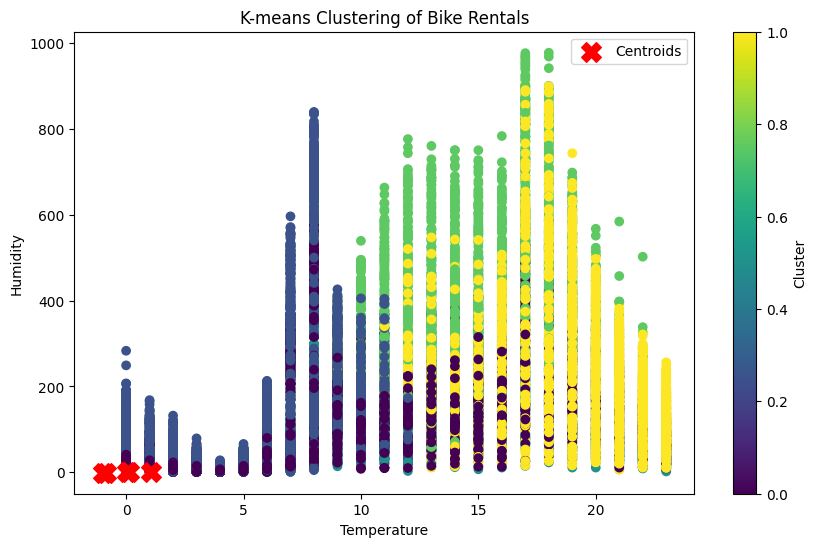

In [ ]:
# Plotting the clusters based on two selected features (e.g., 'temp' and 'hum')
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['hr'], hour_df['cnt'], c=hour_df['demand_cluster'], cmap='viridis', marker='o')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()

In [ ]:
class GaussianMixtureModel:
    def __init__(self, n_components=3, max_iter=100):
        self.n_components = n_components
        self.max_iter = max_iter
        self.means = None
        self.covariances = None
        self.weights = None

    def fit(self, X):
        n_samples, n_features = X.shape

        # Step 1: Initialize parameters
        self.means = X[np.random.choice(n_samples, self.n_components, replace=False)]
        self.covariances = np.array([np.eye(n_features)] * self.n_components)
        self.weights = np.ones(self.n_components) / self.n_components

        # EM algorithm
        for _ in range(self.max_iter):
            # Step 2: E-step
            responsibilities = self.e_step(X)
            # Step 3: M-step
            self.m_step(X, responsibilities)

    def e_step(self, X):
        """ E-step: Calculate responsibilities """
        responsibilities = np.zeros((X.shape[0], self.n_components))
        for k in range(self.n_components):
            responsibilities[:, k] = self.weights[k] * self.multivariate_gaussian(X, self.means[k], self.covariances[k])
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)  # Normalize
        return responsibilities

    def m_step(self, X, responsibilities):
        """ M-step: Update means, covariances, and weights """
        N_k = responsibilities.sum(axis=0)
        self.means = (responsibilities.T @ X) / N_k[:, np.newaxis]
        for k in range(self.n_components):
            diff = X - self.means[k]
            self.covariances[k] = (responsibilities[:, k][:, np.newaxis] * diff).T @ diff / N_k[k]
        self.weights = N_k / N_k.sum()

    def multivariate_gaussian(self, X, mean, covariance):
        """ Calculate the probability density function of a multivariate Gaussian """
        n = mean.shape[0]
        diff = X - mean
        exponent = -0.5 * np.sum(diff @ np.linalg.inv(covariance) * diff, axis=1)
        denominator = np.sqrt((2 * np.pi) ** n * np.linalg.det(covariance))
        return np.exp(exponent) / denominator

    def predict(self, X):
        """ Predict the closest cluster each sample in X belongs to """
        responsibilities = self.e_step(X)
        return np.argmax(responsibilities, axis=1)

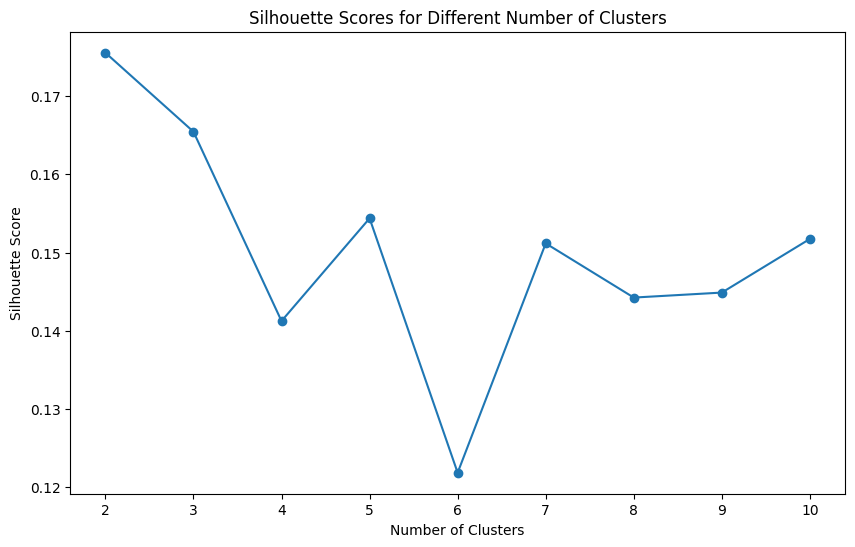

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Trying different numbers of clusters
silhouette_scores = []
for n in range(2, 11):
    gmm = GaussianMixture(n_components=n)
    gmm.fit(X_scaled)
    labels = gmm.predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data
X = hour_df[features]  # Your selected features
y = hour_df['cnt']     # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
#12814.61, 0.5953

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#8208.99, 0.74075

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
##MSE: 4166.506505523591, R-squared: 0.8684208942921058

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#MSE: 4886.77995970426, R-squared: 0.845674515079548

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='rbf')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#MSE: 30154.361201306034, R-squared: 0.04771926437636387

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}, R-squared: {r2}')


MSE: 10595.534881471782, R-squared: 0.6653909087181091


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['hr', 'temp', 'hum', 'windspeed', 'weathersit', 'holiday', 'season']
X = hour_df[features]

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

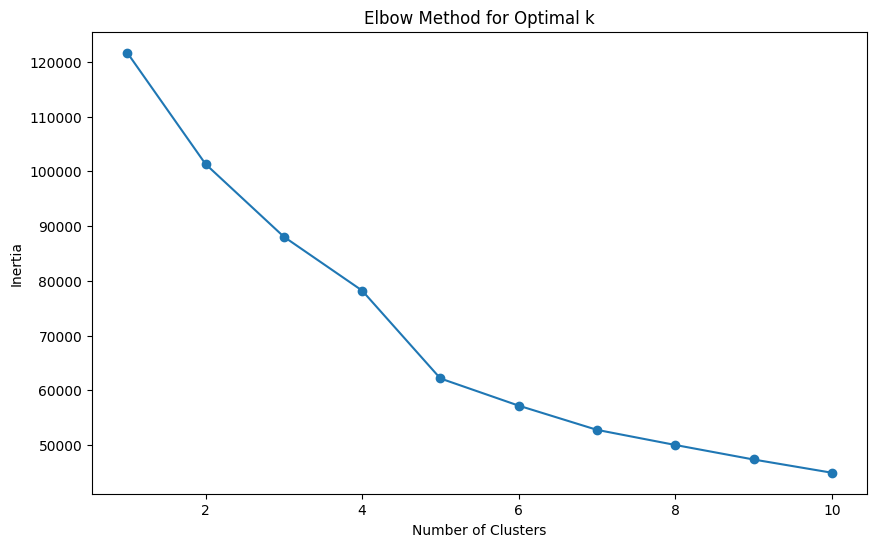

In [ ]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Fit the K-Means model with the chosen number of clusters
optimal_k = 5  # You can adjust this based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
hour_df['demand_cluster'] = clusters

In [ ]:
from sklearn.mixture import GaussianMixture

# Fit the GMM model
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
clusters_gmm = gmm.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
hour_df['demand_cluster_gmm'] = clusters_gmm

In [ ]:
# Analyze average count for each cluster
cluster_analysis = hour_df.groupby('demand_cluster')['cnt'].mean().reset_index()
print(cluster_analysis)

# Optionally for GMM
cluster_analysis_gmm = hour_df.groupby('demand_cluster_gmm')['cnt'].mean().reset_index()
print(cluster_analysis_gmm)

   demand_cluster         cnt
0               0  151.765502
1               1  317.467042
2               2  125.431446
3               3  106.983668
4               4  156.870000
   demand_cluster_gmm         cnt
0                   0  113.164603
1                   1  232.189435
2                   2  107.282326
3                   3  199.553571
4                   4  156.870000


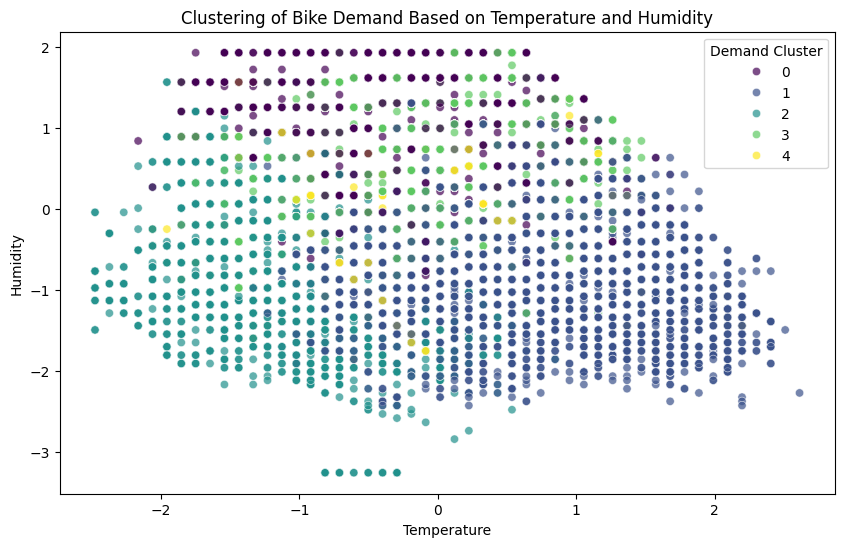

In [ ]:
import seaborn as sns

# Visualize clusters based on two features, e.g., temperature and humidity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=hour_df, x='temp', y='hum', hue='demand_cluster', palette='viridis', alpha=0.7)
plt.title('Clustering of Bike Demand Based on Temperature and Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Demand Cluster')
plt.show()

In [ ]:
# Assuming 'demand_cluster' is the cluster label column
cluster_analysis = hour_df.groupby('demand_cluster')['cnt'].mean().reset_index()
cluster_analysis = cluster_analysis.sort_values(by='cnt')
print(cluster_analysis)

   demand_cluster         cnt
3               3  106.983668
2               2  125.431446
0               0  151.765502
4               4  156.870000
1               1  317.467042


In [ ]:
# Define thresholds
low_threshold = 120
high_threshold = 250

# Create a new column to label the demand type
def label_demand_type(avg_count):
    if avg_count < low_threshold:
        return 'Low Demand'
    elif avg_count <= high_threshold:
        return 'Medium Demand'
    else:
        return 'High Demand'

# Apply the function to categorize demand
cluster_analysis['demand_type'] = cluster_analysis['cnt'].apply(label_demand_type)
print(cluster_analysis)

   demand_cluster         cnt    demand_type
3               3  106.983668     Low Demand
2               2  125.431446  Medium Demand
0               0  151.765502  Medium Demand
4               4  156.870000  Medium Demand
1               1  317.467042    High Demand


In [ ]:
# Create a dictionary to map cluster numbers to demand types
demand_type_mapping = cluster_analysis.set_index('demand_cluster')['demand_type'].to_dict()

# Create a color mapping for the clusters based on demand types
color_map = {
    'Low Demand': 'red',
    'Medium Demand': 'orange',
    'High Demand': 'green'
}

# Create a new column in the original DataFrame to store demand types based on cluster
hour_df['demand_type'] = hour_df['demand_cluster'].map(demand_type_mapping)

<Figure size 1200x600 with 0 Axes>

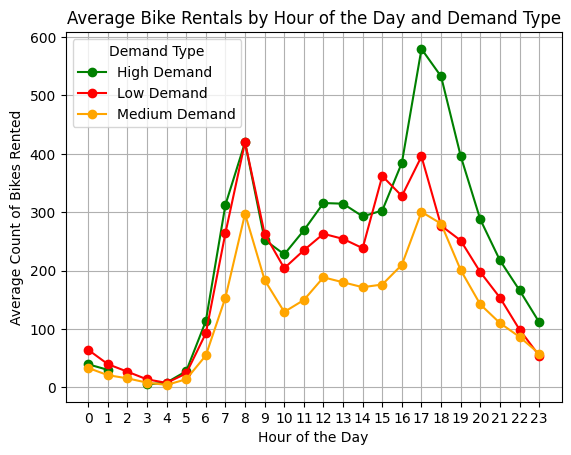

In [ ]:
# Calculate average count for each hour
hourly_avg = hour_df.groupby(['hr', 'demand_type'])['cnt'].mean().unstack()

# Plot
plt.figure(figsize=(12, 6))
hourly_avg.plot(kind='line', marker='o', color=[color_map[d] for d in hourly_avg.columns])
plt.title('Average Bike Rentals by Hour of the Day and Demand Type')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count of Bikes Rented')
plt.xticks(range(0, 24))  # Show all hours
plt.legend(title='Demand Type')
plt.grid()
plt.show()

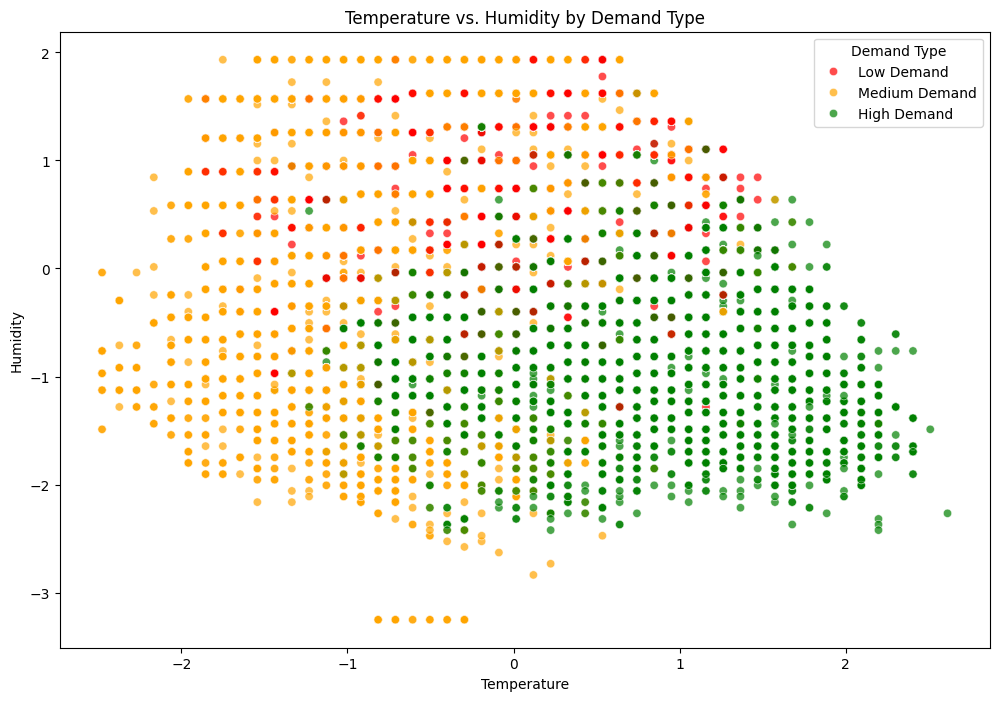

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=hour_df, x='temp', y='hum', hue='demand_type', palette=color_map, alpha=0.7)
plt.title('Temperature vs. Humidity by Demand Type')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.legend(title='Demand Type')
plt.show()

<ipython-input-115-166562340aa2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hour_df, x='demand_type', y='cnt', palette=color_map)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_gro

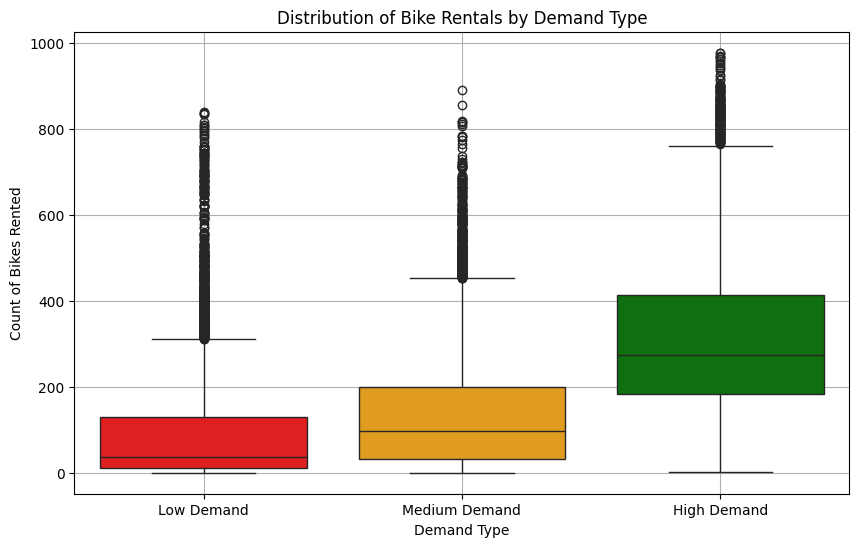

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=hour_df, x='demand_type', y='cnt', palette=color_map)
plt.title('Distribution of Bike Rentals by Demand Type')
plt.xlabel('Demand Type')
plt.ylabel('Count of Bikes Rented')
plt.grid()
plt.show()